In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import seaborn as sns

In [2]:
#Read the file
EWA1=pd.read_csv('EastWestAirlines.csv')
EWA1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
EWA1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
#Drop the column which is not necessary for the futher procedure of clustering
EWA=EWA1.drop(['ID#','Award?'],axis=1)
EWA 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [5]:
EWA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


In [6]:
#Normalized the data by formula using norm_function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x) 

In [7]:
df_norm = norm_func(EWA.iloc[:,0:10])
df_norm 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


In [8]:
#Normalized the data
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data_norm = pd.DataFrame(trans.fit_transform(EWA.iloc[:,0:10]))
data_norm 

,0,1,2,3,4,5,6,7,8,9
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


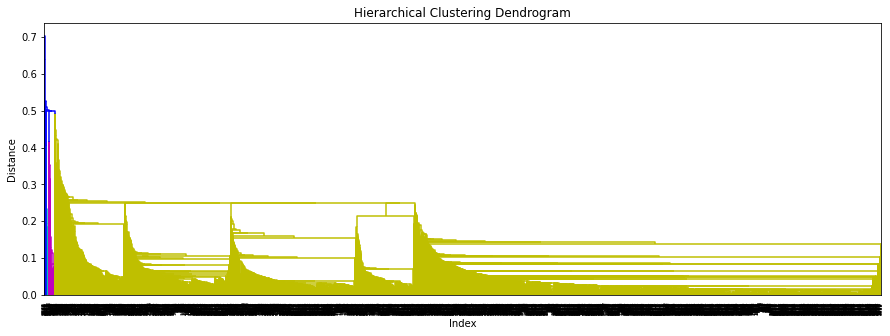

In [9]:
from scipy.cluster.hierarchy import linkage 
# for creating dendrogram 
import scipy.cluster.hierarchy as sch 
#p = np.array(df_norm) 
# converting into numpy array format
#leaf_rotation=0.,  # rotates the x axis labels
#leaf_font_size=8.,  # font size for the x axis labels
SINGLE_L= linkage(data_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(SINGLE_L) 
plt.show()

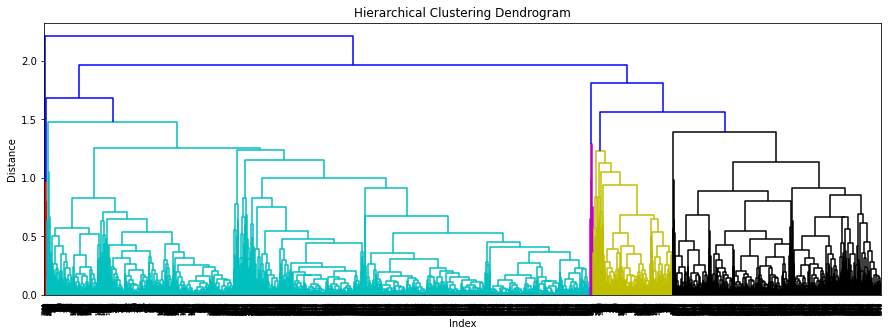

In [10]:
from scipy.cluster.hierarchy import linkage 
# for creating dendrogram 
import scipy.cluster.hierarchy as sch 
#p = np.array(df_norm) 
# converting into numpy array format
#leaf_rotation=0.,  # rotates the x axis labels
#leaf_font_size=8.,  # font size for the x axis labels
COMPLETE_L= linkage(data_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(COMPLETE_L) 
plt.show()

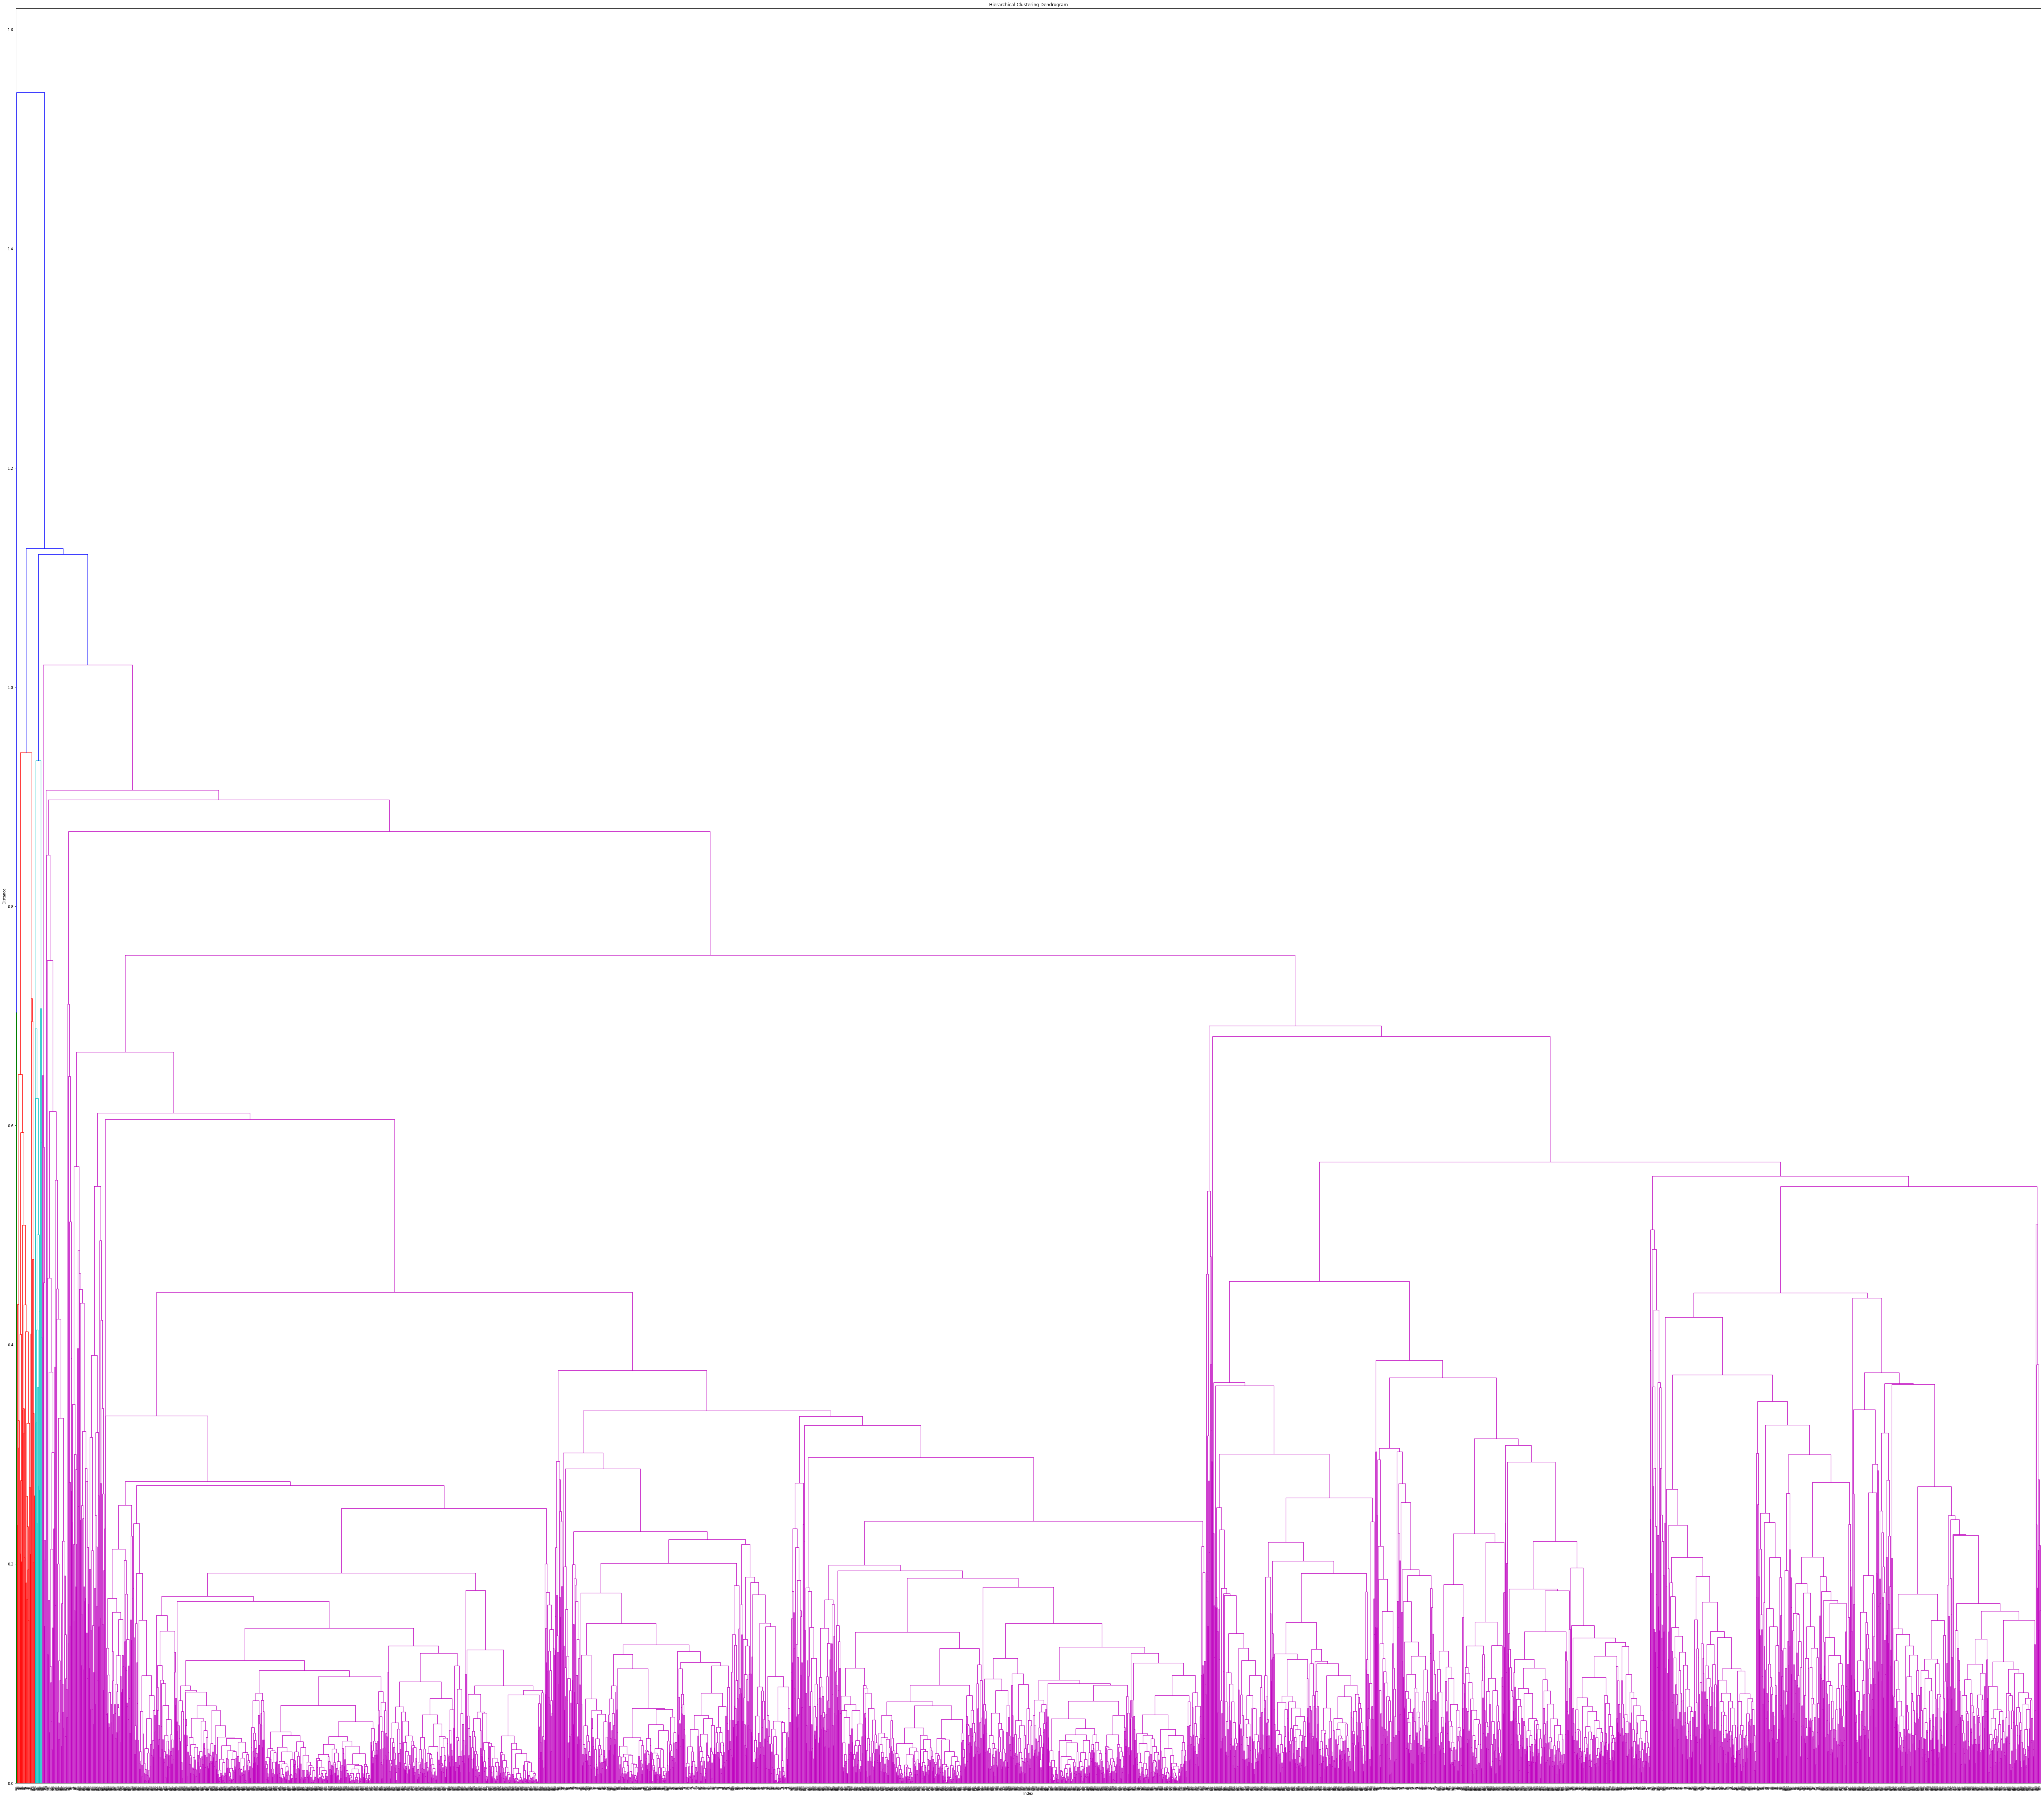

In [11]:
#If we using single, complete linkage then we got very complicated dendrogram & its very dificult to cut the dendrogram to classifying the clusters so we used directly average linkage which is give a best dendrogram
from scipy.cluster.hierarchy import linkage 
# for creating dendrogram 
import scipy.cluster.hierarchy as sch 
#p = np.array(df_norm) 
# converting into numpy array format
#leaf_rotation=0.,  # rotates the x axis labels
#leaf_font_size=8.,  # font size for the x axis labels
AVG_L= linkage(data_norm, method="average",metric="euclidean")
plt.figure(figsize=(100, 90))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(AVG_L) 
plt.show()   

In [12]:
# Creating a  new column as clust and assigning the obs. which cluster belong it
from sklearn.cluster import AgglomerativeClustering 
AVG_L = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(data_norm) 
#n_clusters=5 (no.of cluster getting in denderogram)
cluster_labels=pd.Series(AVG_L.labels_)
cluster_labels
EWA['Clust']=cluster_labels 
EWA 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clust
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,2
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,2
3997,54899,0,1,1,1,500,1,500,1,1401,2


In [13]:
#Find mean for each & every cluster based on variables by using groupby function
EWA.iloc[:,0:].groupby(EWA.Clust).mean() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clust
Clust,,,,,,,,,,,
0,363331.457143,512.228571,4.771429,1.000000,1.000000,108066.600000,38.457143,5056.371429,15.571429,6216.057143,0.0
1,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,1.0
2,70554.741878,125.024873,2.031980,1.014721,1.000761,16041.882741,11.265736,405.865228,1.213706,4096.237310,2.0
3,223573.500000,250.000000,1.000000,1.000000,1.000000,49057.500000,72.000000,21845.000000,53.000000,1822.500000,3.0
4,158765.285714,9158.000000,1.285714,1.000000,1.000000,9694.000000,14.000000,1770.142857,5.142857,5789.857143,4.0


In [14]:
#No. of observation belongs to CLUSTER[0]
data = EWA[(EWA.Clust==0)]
data 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clust
94,185549,0,5,1,1,110859,39,2950,16,6778,0
112,124198,0,5,1,1,66330,23,4833,10,7710,0
121,205126,0,5,1,1,126630,45,2250,10,7668,0
126,602064,0,5,1,1,194753,26,2250,10,7652,0
151,930410,0,5,1,1,211284,18,2250,6,7640,0
186,707079,0,4,1,1,57173,40,3450,12,7523,0
190,123516,0,5,1,1,240544,31,500,2,7507,0
220,1302051,2706,5,1,1,90653,32,3050,7,7467,0
238,30962,0,5,1,1,97683,37,6400,18,7360,0
243,118934,0,5,1,1,66222,37,2250,17,7354,0


In [15]:
#Standardize the data OR transform data into z-Score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_stand = pd.DataFrame(scaler.fit_transform(EWA.iloc[:,0:10]))
data_stand  

,0,1,2,3,4,5,6,7,8,9
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


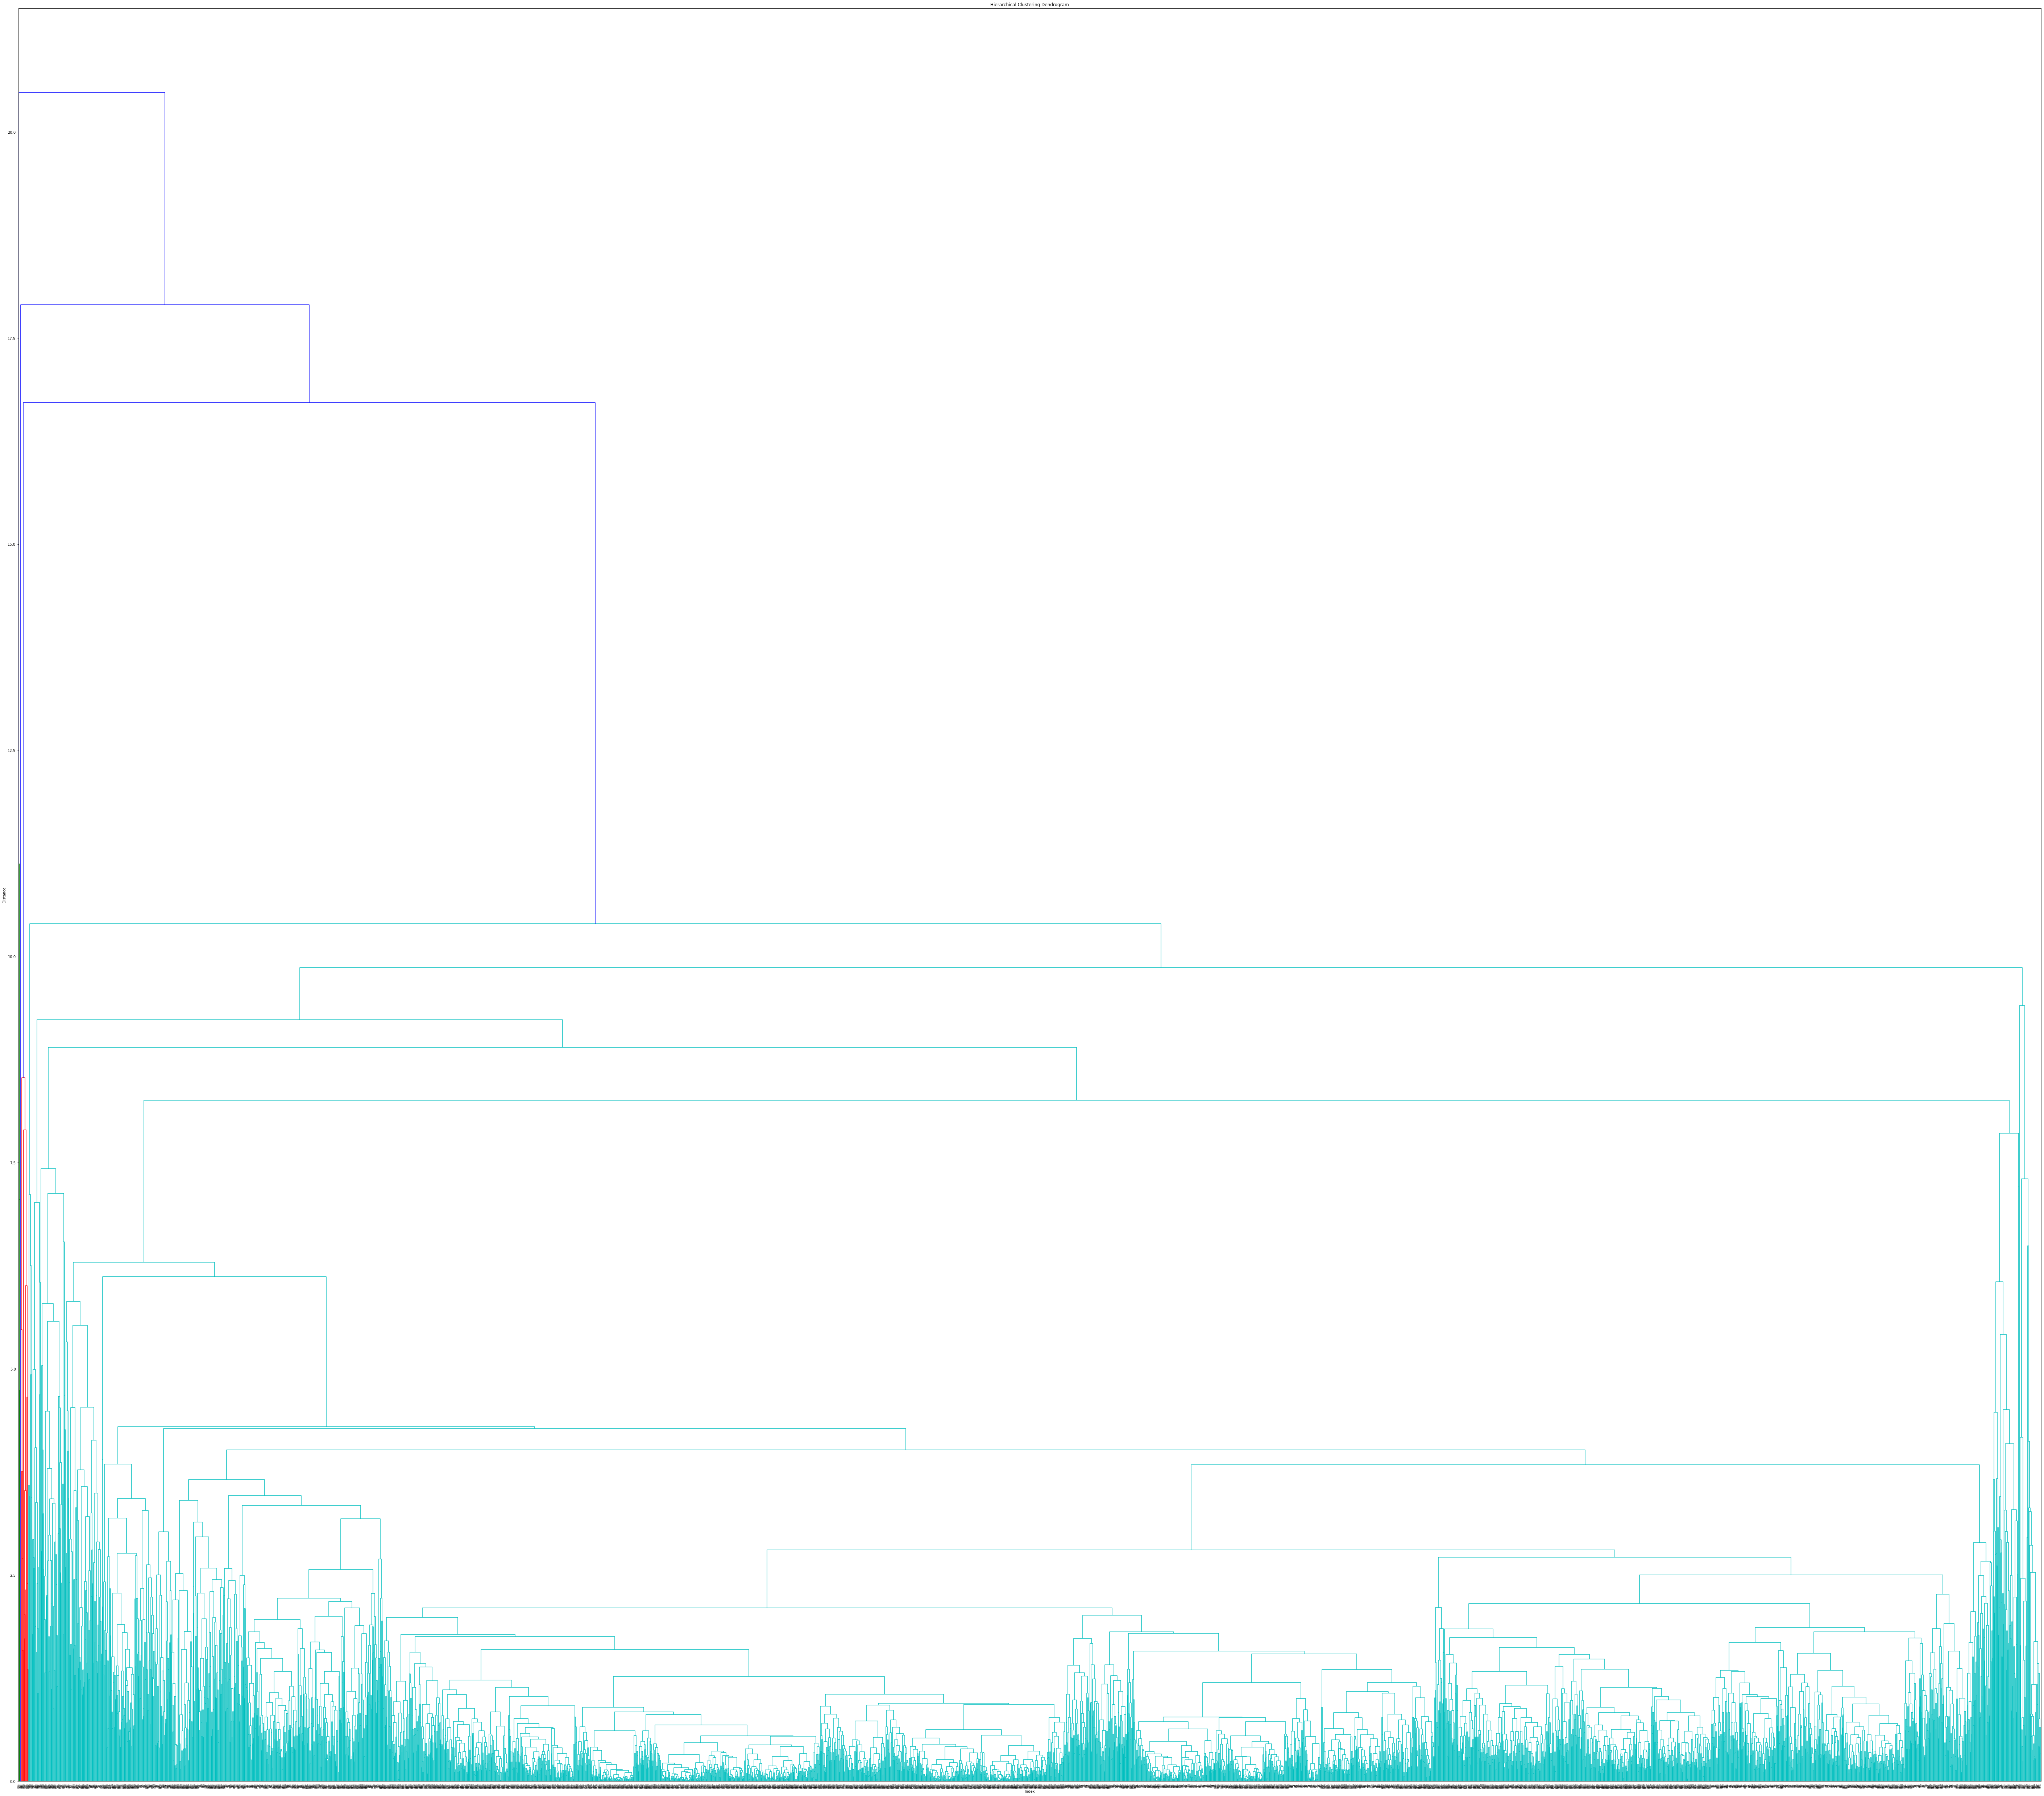

In [16]:
from scipy.cluster.hierarchy import linkage 
# for creating dendrogram 
import scipy.cluster.hierarchy as sch 
#p = np.array(df_norm) 
# converting into numpy array format
#leaf_rotation=0.,  # rotates the x axis labels
#leaf_font_size=8.,  # font size for the x axis labels
AVG_L= linkage(data_stand, method="average",metric="euclidean")
plt.figure(figsize=(100, 90))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(AVG_L) 
plt.show()  

In [17]:
# Creating a  new column as clust and assigning the obs. which cluster belong it
from sklearn.cluster import AgglomerativeClustering 
AVG_L = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(data_stand) 
cluster_labels=pd.Series(AVG_L.labels_)
cluster_labels
EWA['Clust']=cluster_labels 
EWA 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clust
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
#Find mean for each & every cluster based on variables by using groupby function
EWA.iloc[:,0:].groupby(EWA.Clust).mean() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clust
Clust,,,,,,,,,,,
0,7.288966e+04,144.193013,2.054034,1.014577,1.000754,16806.654184,11.476753,439.180699,1.319176,4117.825333,0.0
1,1.380614e+05,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,1.0
2,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,2.0
3,1.226280e+05,296.000000,3.000000,1.000000,1.000000,63527.666667,63.666667,16341.000000,48.000000,2476.000000,3.0
4,1.601140e+05,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,4.0


In [19]:
#No. of observation belongs to CLUSTER[0]
data = EWA[(EWA.Clust==0)]
data 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clust
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [20]:
data= EWA[EWA.Clust==1]
data 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clust
106,96627,1182,1,1,3,49059,26,2300,9,6738,1
384,28193,0,5,1,4,103456,32,0,0,6980,1
850,25629,0,4,1,5,107308,36,600,2,5966,1
904,15835,0,2,1,5,112171,16,0,0,5825,1
1036,154664,0,4,1,3,73881,33,0,0,5769,1
1244,166465,0,4,1,4,98717,30,0,0,5531,1
1300,737514,0,3,1,4,43993,40,2150,7,5030,1
1878,128302,0,5,1,4,132263,32,400,2,4103,1
1917,82981,0,5,1,3,105325,44,1000,2,3964,1
1946,126873,0,4,1,5,95598,32,500,1,3880,1


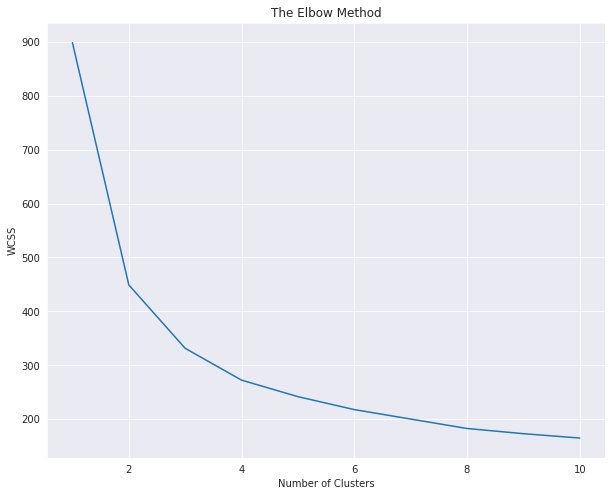

In [21]:
#K-MEANS CLUSTERING:-
#Apply the ELBOW CURVE method to find the optimum k- value
#Where ROC curve will be going to flat that point should be consider as optimum k- value for classifying the data
from sklearn.cluster import KMeans
sns.set_style(style='darkgrid')
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(data_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [22]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(data_norm) 

In [23]:
#clf.cluster_centers_
y_kmeans
clf.labels_

array([3, 3, 3, ..., 4, 0, 0], dtype=int32)

In [24]:
y_kmeans 

array([3, 3, 3, ..., 4, 0, 0], dtype=int32)

In [25]:
clf.cluster_centers_ 

array([[ 2.34871095e-02,  1.08482322e-02,  2.23311547e-02,
         1.05301380e-02,  1.27087872e-03,  1.67714831e-02,
         8.32277786e-02,  1.30020474e-02,  2.21153451e-02,
         2.60647599e-01],
       [ 8.80325724e-02,  1.85087735e-02,  8.65491651e-01,
         3.72965547e-17,  1.25231911e-02,  2.24582671e-01,
         2.43430988e-01,  2.21771192e-02,  3.81909196e-02,
         7.18099858e-01],
       [ 5.41028408e-02,  9.63628554e-03,  4.16493776e-01,
         2.07468880e-03,  3.63070539e-03,  6.36851370e-02,
         1.87469845e-01,  1.06944394e-02,  1.87504893e-02,
         7.06265940e-01],
       [ 3.75119371e-02,  1.52326450e-02, -2.22044605e-15,
         1.25603865e-02,  7.24637681e-04,  1.60218728e-02,
         8.03505224e-02,  1.64765699e-02,  2.95688634e-02,
         6.87915366e-01],
       [ 4.93838193e-02,  1.12577832e-02,  6.38250883e-01,
         8.83392226e-04,  2.20848057e-03,  1.21188046e-01,
         2.12281206e-01,  1.34882644e-02,  2.29015268e-02,
         3.

In [26]:
#Cal. distance on Y-axis of k-value= 5 on X-axis
clf.inertia_

241.07545280590514

In [27]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
EWA['clust']=md # creating a  new column and assigning it to new column 
EWA  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clust,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [28]:
#Mean value of each & every cluster
EWA.iloc[:,0:].groupby(EWA.clust).mean() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clust,clust
clust,,,,,,,,,,,,
0,40041.716776,120.936093,1.089325,1.021060,1.005084,4422.388526,7.157589,400.684096,1.172113,2163.811184,0.006536,0.0
1,150081.274583,206.335807,4.461967,1.000000,1.050093,59219.081633,20.935065,683.432282,2.024119,5957.920223,0.022263,1.0
2,92236.578838,107.425311,2.665975,1.004149,1.014523,16792.815353,16.122407,329.570539,0.993776,5859.769710,0.004149,2.0
3,63951.775845,169.813527,1.000000,1.025121,1.002899,4224.727536,6.910145,507.758454,1.567150,5707.570048,0.002899,3.0
4,84191.411661,125.501767,3.553004,1.001767,1.008834,31955.469965,18.256184,415.667845,1.213781,2734.077739,0.007067,4.0


In [29]:
plt.style.use(['classic']) 
print(plt.style.available) 

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

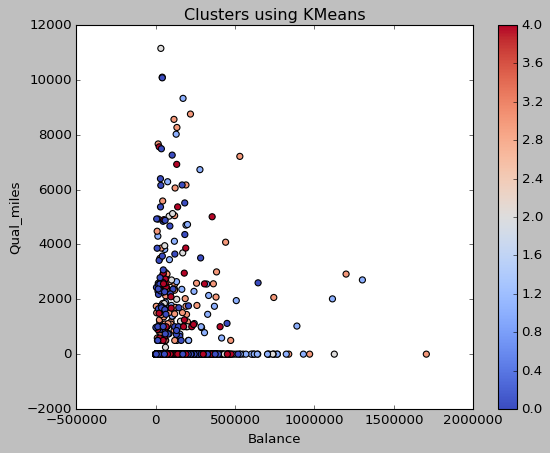

In [30]:
EWA.plot(x="Balance",y ="Qual_miles",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [31]:
#Within Cluster Sum of Square:- minimized the within cluster variance or within cluster sum of squared
WCSS 

[898.2705822007468,
 448.99891944456994,
 331.43247345365694,
 272.39276621164277,
 241.75971556454482,
 217.7631850685578,
 200.21570874588886,
 182.7269420708588,
 173.05581151489054,
 164.99856303017972]

In [32]:
#DBSCAN-Clustering:-
from sklearn.cluster import DBSCAN

In [33]:
array=EWA.iloc[:,0:10].values
array 

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]])

In [34]:
#Transformation the data into Z-Score
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X 

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [35]:
#For finding out optimum epsilon value by creating this curve plot
from sklearn.neighbors import NearestNeighbors 

In [36]:
#n_neighbors= no. of independent variable * 2= 10*2 = 20
neigh = NearestNeighbors(n_neighbors=20)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X) 

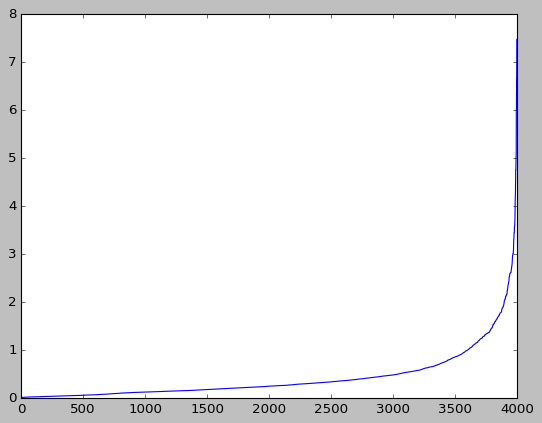

In [37]:
#Where this curve will be going to flat that point should be consider as optimum epsilon - value for classifying the data into no. of clusters
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [38]:
dbscan = DBSCAN(eps=0.55, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.55, min_samples=6)

In [39]:
dbscan.labels_   

array([0, 0, 0, ..., 4, 0, 0])

In [40]:
dl = dbscan.labels_
dl 

array([0, 0, 0, ..., 4, 0, 0])

In [41]:
#Apply Silhouette Score for finding which type of clustering model is better for classifying data
#whichever model having greater silhouette score then this model should be consider as accuarte or good for creating homogeneous cluster
import sklearn
sklearn.metrics.silhouette_score(X, dl)

-0.05498115297730342

In [42]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(X)

In [43]:
y_kmeans 

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [44]:
sklearn.metrics.silhouette_score(X, y_kmeans)

0.3478687759219968

In [45]:
#CONCLUSION:- K-MEANS CLUSTERING is good for classifying the data as compared to DBSCAN Clustering